In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow
import skimage

In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [4]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()
#reshaping data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1)) 
#checking the shape after reshaping
print(X_train.shape)
print(X_test.shape)
#normalizing the pixel values
X_train=X_train/255
X_test=X_test/255

11490434/11490434 [==============================] - 3s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
mdl=model.fit(X_train,y_train,epochs=10)

Epoch 1/10


2023-10-27 11:25:05.377281: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 12s 6ms/step - loss: 0.1600 - accuracy: 0.9519
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0560 - accuracy: 0.9830
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0351 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0241 - accuracy: 0.9922
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0119 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0085 - accuracy: 0.9975
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0067 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0041

In [6]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0640 - accuracy: 0.9847


[0.06395871937274933, 0.9847000241279602]

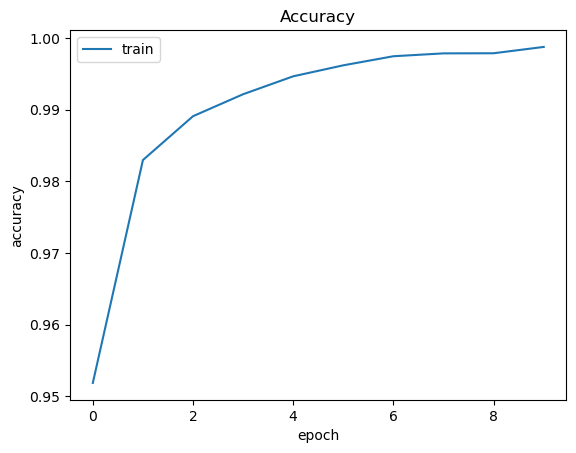

In [7]:
plt.plot(mdl.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

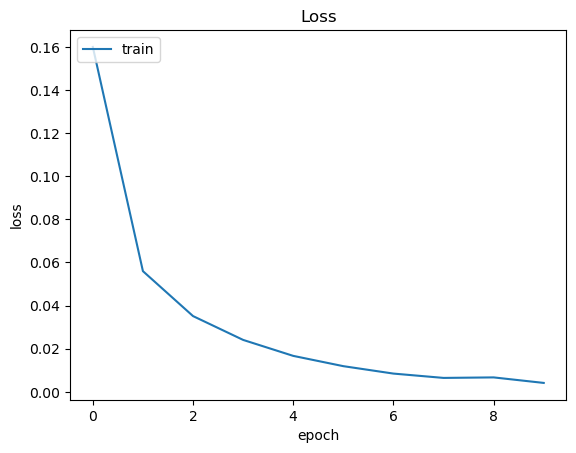

In [8]:
plt.plot(mdl.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()

In [9]:
model.save('example1.h5')